**Team Name:** DataNerds

**Student Details:**

--------------------------

Name : Reshma Vijay Jawale

Student Id : A0236581B

--------------------------
Name : Aiden Low Yew Woei

Student Id : A0121969W

--------------------------
Name : Raivat Bhupesh Shah 

Student Id : A0184879A

--------------------------

In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

from IPython.display import display
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Scikit learn
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn import preprocessing
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedKFold
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer

from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.patches import Rectangle, Circle
from matplotlib.colors import ListedColormap

from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

# For adaboost
from sklearn.ensemble import AdaBoostClassifier


import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

data\example-submission.csv
data\test.csv
data\train.csv
data\auxiliary-data\auxiliary-data\sg-commerical-centres.csv
data\auxiliary-data\auxiliary-data\sg-gov-markets-hawker-centres.csv
data\auxiliary-data\auxiliary-data\sg-primary-schools.csv
data\auxiliary-data\auxiliary-data\sg-secondary-schools.csv
data\auxiliary-data\auxiliary-data\sg-shopping-malls.csv
data\auxiliary-data\auxiliary-data\sg-train-stations.csv


In [30]:
df_prices_train = pd.read_csv("data/train.csv")
df_prices_train_demo = pd.read_csv("data/train.csv")
df_prices_test = pd.read_csv("data/test.csv")
df_commercial_centres = pd.read_csv("data/auxiliary-data/auxiliary-data/sg-commerical-centres.csv")
df_train_stations = pd.read_csv("data/auxiliary-data/auxiliary-data/sg-train-stations.csv")
df_shopping_malls = pd.read_csv("data/auxiliary-data/auxiliary-data/sg-shopping-malls.csv")
df_primary_schools = pd.read_csv("data/auxiliary-data/auxiliary-data/sg-primary-schools.csv")
df_secondary_schools = pd.read_csv("data/auxiliary-data/auxiliary-data/sg-secondary-schools.csv")
print("Property Prices train dataset", df_prices_train.shape)
display(df_prices_train.head())
print("Aux: Commercial Centres", df_commercial_centres.shape)
display(df_commercial_centres.head())
print("Aux: Train Stations", df_train_stations.shape)
display(df_train_stations.head())
print("Aux: Shopping Malls", df_shopping_malls.shape)
display(df_shopping_malls.head())
print("Aux: Primary Schools", df_primary_schools.shape)
display(df_primary_schools.head())
print("Aux: Secondary Schools", df_secondary_schools.shape)
display(df_secondary_schools.head())

Property Prices train dataset (26048, 23)


,listing_id,name,street,type,model,market_segment,type_of_area,bedrooms,bathrooms,district,...,lat,lng,tenure,built_year,no_of_units,area_size,eco_category,accessibility,date_listed,price
0,6998418,seascape,57 cove way,condominium,condominium,ocr,strata,3,4.0,4,...,1.239337,103.837487,leasehold/99 years,2011.0,151.0,2336.0,uncategorized,guarded,2021-05-04,5390000.0
1,2046604,la maison,10 moulmein rise,apartment,apartment,ocr,strata,3,3.0,11,...,1.319533,103.847030,freehold,1999.0,24.0,1259.0,uncategorized,guarded,2021-05-07,2310000.0
2,7563513,viva,2 suffolk walk,condominium,condominium,ocr,strata,4,3.0,11,...,1.315656,103.844445,freehold,2012.0,235.0,1959.0,uncategorized,guarded,2021-06-30,5279500.0
3,3071445,urban treasures,205 jalan eunos,condominium,condominium,ocr,strata,3,2.0,14,...,1.329367,103.905791,freehold,NaN,237.0,883.0,uncategorized,guarded,2022-01-02,1843600.0
4,9667539,infini at east coast,east coast road,apartment,apartment,ocr,strata,3,3.0,15,...,1.309176,103.911352,freehold,NaN,36.0,1066.0,uncategorized,guarded,2021-12-24,2262700.0


Aux: Commercial Centres (38, 4)


,name,type,lat,lng
0,Central Business District,CR,1.286768,103.854529
1,Jurong Lake District,CR,1.334085,103.734513
2,Seletar Regional Centre,CR,1.409435,103.866820
3,Tampines Regional Centre,CR,1.353180,103.945188
4,Woodlands Regional Centre,CR,1.436748,103.786485


Aux: Train Stations (166, 6)


,name,codes,lat,lng,opening_year,type
0,Eunos,EW7,1.319778,103.903252,1989.0,mrt
1,Chinese Garden,EW25,1.342352,103.732596,1988.0,mrt
2,Khatib,NS14,1.417383,103.832980,1988.0,mrt
3,Kranji,NS7,1.425177,103.762165,1996.0,mrt
4,Redhill,EW18,1.289562,103.816816,1988.0,mrt


Aux: Shopping Malls (174, 4)


,name,lat,lng,wikipedia_link
0,100 AM,1.275012,103.841372,NaN
1,313@Somerset,1.301013,103.838540,NaN
2,Aperia,1.309714,103.863837,NaN
3,Balestier Hill Shopping Centre,1.325442,103.842521,NaN
4,Bugis Cube,1.298276,103.855555,NaN


Aux: Primary Schools (191, 3)


,name,lat,lng
0,Admiralty Primary School,1.442941,103.800345
1,Ahmad Ibrahim Primary School,1.433849,103.832710
2,Ai Tong School,1.360713,103.833018
3,Alexandra Primary School,1.291284,103.824066
4,Anchor Green Primary School,1.390380,103.887354


Aux: Secondary Schools (150, 3)


,name,lat,lng
0,Admiralty Secondary School,1.445912,103.802908
1,Ahmad Ibrahim Secondary School,1.436095,103.830055
2,Anderson Secondary School,1.375417,103.851723
3,Anglican High School,1.330218,103.941759
4,Anglo-Chinese School (Barker Road),1.319709,103.835661


# EDA

Key notes:
1. Many rows have missing values in the columns: `built_year` (10043 rows), `model` (1280 rows) (actually how do we handle them in the test dataset?)

In [31]:
categorical_columns = [
    'name',
    'street',
    'type',
    'model',
    'market_segment',
    'type_of_area',
    'tenure',
    'uncategorized',
    'accessibility',
    'date_listed'
]

In [32]:
# Catching null values
print(df_prices_train[df_prices_train.isna().any(axis=1)].shape)
print(df_prices_train[df_prices_train['built_year'].isna()].shape)
print(df_prices_train[df_prices_train['model'].isna()].shape)
print(df_prices_train[df_prices_train['bedrooms'].isna()].shape)
print(df_prices_train[df_prices_train['bathrooms'].isna()].shape)
not_na = df_prices_train[~df_prices_train['built_year'].isna() & ~df_prices_train['model'].isna()]
not_na[not_na.isna().any(axis=1)] # let's drop these?

(11576, 23)
(10043, 23)
(1280, 23)
(404, 23)
(1236, 23)


,listing_id,name,street,type,model,market_segment,type_of_area,bedrooms,bathrooms,district,...,lat,lng,tenure,built_year,no_of_units,area_size,eco_category,accessibility,date_listed,price
15,2882890,the line @ tanjong rhu,6 tanjong rhu road,condominium,condominium,ocr,strata,3,NaN,15,...,1.298437,103.884408,freehold,2016.0,130.0,1216.0,uncategorized,guarded,2021-12-24,2809000.0
59,9357059,suites @ eastcoast,173 upper east coast road,condominium,condominium,ocr,strata,NaN,1.0,15,...,1.314620,103.932237,freehold,2012.0,116.0,409.0,uncategorized,guarded,2021-12-06,715000.0
111,7616417,eden residences capitol,stamford road,apartment,apartment,ocr,strata,NaN,NaN,6,...,1.292988,103.851047,leasehold/99 years,2016.0,39.0,6609.0,uncategorized,guarded,2021-11-07,27423000.0
136,1265096,helios residences,17 cairnhill circle,apartment,apartment,ocr,strata,2+1,NaN,9,...,1.306829,103.838165,freehold,2011.0,140.0,1281.0,uncategorized,guarded,2021-06-28,3608000.0
145,8249118,spottiswoode residences,48 spottiswoode park road,condominium,condominium,ocr,strata,1,NaN,2,...,1.275271,103.836832,freehold,2013.0,351.0,603.0,uncategorized,guarded,2022-01-05,1518000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25866,2625223,the tennery,woodlands road,apartment,apartment,ocr,strata,NaN,2.0,23,...,1.379727,103.760191,leasehold/99 years,2014.0,338.0,624.0,uncategorized,guarded,2021-11-01,825000.0
25884,7034100,v on shenton,shenton way,apartment,apartment,ocr,strata,NaN,1.0,1,...,1.277083,103.849181,leasehold/99 years,2017.0,510.0,441.0,uncategorized,guarded,2021-12-18,1099800.0
26000,8873630,residences @ somme,petain road,apartment,apartment,ocr,strata,NaN,1.0,8,...,1.311510,103.858718,freehold,2008.0,28.0,441.0,uncategorized,guarded,2022-01-04,858000.0
26013,2373007,beauty world centre,upper bukit timah road,apartment,apartment,ocr,strata,3+1,NaN,21,...,1.342413,103.776539,leasehold/99 years,1984.0,80.0,1873.0,uncategorized,guarded,2021-10-12,1980000.0


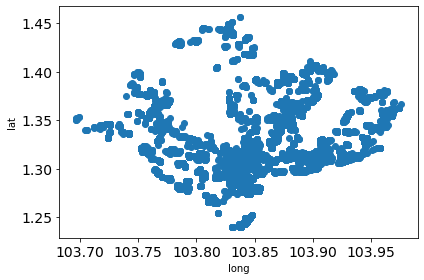

In [33]:
lat = df_prices_train['lat']
long = df_prices_train['lng']

plt.figure()
plt.tick_params(labelsize=14)
plt.scatter(long, lat)
plt.xlabel("long")
plt.ylabel("lat")
plt.tight_layout()
plt.show()

## Dealing with the Bedrooms Column

Some of the values in the bedroom column are math expressions, e.g. '4+1. We're not sure what this means! Is it 5 bedrooms? Is the +1 because it is not a *full room* (e.g. a servant quarter or living room) or is the +1 referring to a bathroom? Due to these different possibilities, we follow an iterative approach where for we take 4+1 as 5, 4.5 (to quantify only half a room) and 4 (to quantify no room). We will go with the representation that gives us the most accuracy

In [34]:
def process_bedroom_custom(expr):
    if (type(expr) == str):
        print('curr expr is ' + expr)
        if (len(expr) == 1):
            return int(expr)
        elif (len(expr) > 1):
            # assuming all values are of the type operand_1 + operand_2
            op_1, op_2 = int(expr[0]), int(expr[2])
            return op_1 + (op_2 / 2)
        else:
            # null value, returning -1 for completion sake
            return -1
    else:
        return expr

In [35]:
df_prices_train_demo['bedrooms'] = df_prices_train_demo['bedrooms'].apply(process_bedroom_custom)
df_prices_train_demo.head(11)

curr expr is 3
curr expr is 3
curr expr is 4
curr expr is 3
curr expr is 3
curr expr is 2
curr expr is 4
curr expr is 3
curr expr is 1
curr expr is 1
curr expr is 3+1
curr expr is 3
curr expr is 3
curr expr is 2
curr expr is 3+1
curr expr is 3
curr expr is 2
curr expr is 4
curr expr is 3
curr expr is 4
curr expr is 2
curr expr is 1
curr expr is 3
curr expr is 2
curr expr is 3
curr expr is 2
curr expr is 1
curr expr is 3
curr expr is 3
curr expr is 3+1
curr expr is 4
curr expr is 2
curr expr is 2
curr expr is 1+1
curr expr is 2
curr expr is 1
curr expr is 4
curr expr is 1
curr expr is 2+1
curr expr is 2
curr expr is 2
curr expr is 3
curr expr is 4
curr expr is 1
curr expr is 1
curr expr is 4
curr expr is 3
curr expr is 3
curr expr is 2
curr expr is 2+1
curr expr is 4
curr expr is 3
curr expr is 2
curr expr is 3
curr expr is 4
curr expr is 2
curr expr is 3
curr expr is 3
curr expr is 4
curr expr is 2
curr expr is 4
curr expr is 2
curr expr is 5
curr expr is 2
curr expr is 2
curr expr is 

curr expr is 1
curr expr is 2
curr expr is 2
curr expr is 2
curr expr is 3
curr expr is 2
curr expr is 3
curr expr is 3
curr expr is 2+1
curr expr is 3
curr expr is 1
curr expr is 2
curr expr is 1
curr expr is 3
curr expr is 2
curr expr is 3
curr expr is 1
curr expr is 2
curr expr is 1+1
curr expr is 2
curr expr is 1
curr expr is 2
curr expr is 1
curr expr is 1
curr expr is 2
curr expr is 1
curr expr is 4
curr expr is 3
curr expr is 2
curr expr is 2
curr expr is 2
curr expr is 4
curr expr is 2
curr expr is 3
curr expr is 2
curr expr is 3
curr expr is 1
curr expr is 2
curr expr is 2
curr expr is 2
curr expr is 4
curr expr is 2
curr expr is 2
curr expr is 4
curr expr is 3
curr expr is 1+1
curr expr is 2
curr expr is 2+1
curr expr is 3
curr expr is 3
curr expr is 3
curr expr is 2
curr expr is 3
curr expr is 4+1
curr expr is 1
curr expr is 2+1
curr expr is 4
curr expr is 2
curr expr is 4
curr expr is 3
curr expr is 1
curr expr is 1
curr expr is 2
curr expr is 4
curr expr is 2
curr expr is 

curr expr is 1
curr expr is 2
curr expr is 2
curr expr is 1
curr expr is 2
curr expr is 2
curr expr is 1
curr expr is 2
curr expr is 2+1
curr expr is 2
curr expr is 3
curr expr is 5
curr expr is 2
curr expr is 1
curr expr is 4
curr expr is 2
curr expr is 4
curr expr is 3
curr expr is 2
curr expr is 3
curr expr is 3
curr expr is 4
curr expr is 1
curr expr is 1
curr expr is 2
curr expr is 1
curr expr is 2
curr expr is 4
curr expr is 2
curr expr is 3
curr expr is 4
curr expr is 3
curr expr is 3
curr expr is 1
curr expr is 4
curr expr is 2
curr expr is 4
curr expr is 4
curr expr is 3
curr expr is 2
curr expr is 3
curr expr is 1
curr expr is 4
curr expr is 2+1
curr expr is 2
curr expr is 1
curr expr is 3
curr expr is 3
curr expr is 2
curr expr is 2
curr expr is 3
curr expr is 1
curr expr is 2
curr expr is 4
curr expr is 1
curr expr is 5
curr expr is 4
curr expr is 4
curr expr is 3
curr expr is 3
curr expr is 1
curr expr is 1
curr expr is 1
curr expr is 1
curr expr is 4
curr expr is 3
curr e

curr expr is 3
curr expr is 2
curr expr is 3
curr expr is 4
curr expr is 4
curr expr is 3
curr expr is 3
curr expr is 3
curr expr is 2
curr expr is 3+1
curr expr is 1
curr expr is 5
curr expr is 3
curr expr is 4
curr expr is 3
curr expr is 2
curr expr is 3
curr expr is 4
curr expr is 1
curr expr is 2
curr expr is 3
curr expr is 2
curr expr is 3
curr expr is 2
curr expr is 4
curr expr is 4
curr expr is 3
curr expr is 2
curr expr is 3
curr expr is 2
curr expr is 2
curr expr is 2
curr expr is 5
curr expr is 4
curr expr is 5
curr expr is 3
curr expr is 3
curr expr is 3
curr expr is 4
curr expr is 2
curr expr is 2
curr expr is 1
curr expr is 2
curr expr is 4
curr expr is 2
curr expr is 5
curr expr is 3
curr expr is 2
curr expr is 1
curr expr is 2
curr expr is 3
curr expr is 2
curr expr is 1
curr expr is 2
curr expr is 4
curr expr is 4
curr expr is 3
curr expr is 3
curr expr is 1
curr expr is 4
curr expr is 1
curr expr is 2
curr expr is 3
curr expr is 2
curr expr is 3
curr expr is 3
curr exp

curr expr is 4
curr expr is 3
curr expr is 2+1
curr expr is 2
curr expr is 2
curr expr is 2
curr expr is 3
curr expr is 4
curr expr is 1
curr expr is 1
curr expr is 5
curr expr is 3
curr expr is 3
curr expr is 4
curr expr is 4
curr expr is 4
curr expr is 2
curr expr is 2
curr expr is 5
curr expr is 6
curr expr is 1
curr expr is 3
curr expr is 2
curr expr is 3
curr expr is 5
curr expr is 1
curr expr is 3
curr expr is 3
curr expr is 1
curr expr is 1
curr expr is 3
curr expr is 2
curr expr is 3
curr expr is 4+1
curr expr is 3
curr expr is 4
curr expr is 1
curr expr is 1
curr expr is 1
curr expr is 3
curr expr is 1
curr expr is 5
curr expr is 2
curr expr is 1
curr expr is 3
curr expr is 1
curr expr is 3
curr expr is 4
curr expr is 1
curr expr is 1
curr expr is 2+2
curr expr is 1
curr expr is 1
curr expr is 2
curr expr is 1
curr expr is 3
curr expr is 2+1
curr expr is 4
curr expr is 3
curr expr is 3
curr expr is 3
curr expr is 1
curr expr is 1
curr expr is 4
curr expr is 2
curr expr is 3+1


curr expr is 2
curr expr is 3
curr expr is 1
curr expr is 3
curr expr is 4
curr expr is 4
curr expr is 3
curr expr is 2
curr expr is 3
curr expr is 2
curr expr is 3
curr expr is 3
curr expr is 2+1
curr expr is 3
curr expr is 2
curr expr is 2
curr expr is 2
curr expr is 1
curr expr is 1
curr expr is 4
curr expr is 2
curr expr is 2+1
curr expr is 3
curr expr is 1
curr expr is 1+1
curr expr is 4
curr expr is 2
curr expr is 2
curr expr is 3
curr expr is 2
curr expr is 3
curr expr is 3+1
curr expr is 2
curr expr is 1
curr expr is 3
curr expr is 1
curr expr is 4
curr expr is 2
curr expr is 1
curr expr is 1
curr expr is 4+1
curr expr is 3
curr expr is 3
curr expr is 3
curr expr is 2
curr expr is 3
curr expr is 3
curr expr is 4+1
curr expr is 4
curr expr is 2
curr expr is 2
curr expr is 2+1
curr expr is 5
curr expr is 4
curr expr is 3
curr expr is 2
curr expr is 4
curr expr is 4
curr expr is 1
curr expr is 2
curr expr is 1+1
curr expr is 5
curr expr is 2
curr expr is 3
curr expr is 4
curr expr

curr expr is 3
curr expr is 3
curr expr is 1
curr expr is 2
curr expr is 5
curr expr is 3
curr expr is 2
curr expr is 4
curr expr is 1
curr expr is 2
curr expr is 3
curr expr is 4
curr expr is 1
curr expr is 1
curr expr is 3
curr expr is 3
curr expr is 2+1
curr expr is 4
curr expr is 4+1
curr expr is 2
curr expr is 1
curr expr is 3
curr expr is 3
curr expr is 3
curr expr is 3
curr expr is 2
curr expr is 1
curr expr is 2
curr expr is 3
curr expr is 1
curr expr is 2
curr expr is 5
curr expr is 1
curr expr is 4
curr expr is 4
curr expr is 2
curr expr is 1
curr expr is 5
curr expr is 4
curr expr is 1
curr expr is 1
curr expr is 1
curr expr is 4
curr expr is 1
curr expr is 2
curr expr is 4
curr expr is 1
curr expr is 3
curr expr is 4
curr expr is 3
curr expr is 2
curr expr is 1+1
curr expr is 3
curr expr is 1
curr expr is 1
curr expr is 3
curr expr is 1
curr expr is 4
curr expr is 2
curr expr is 3
curr expr is 1
curr expr is 3
curr expr is 3
curr expr is 5
curr expr is 4
curr expr is 2
curr

curr expr is 3
curr expr is 2
curr expr is 3
curr expr is 3+1
curr expr is 3+1
curr expr is 3
curr expr is 3
curr expr is 3
curr expr is 1
curr expr is 3+1
curr expr is 1
curr expr is 3
curr expr is 4
curr expr is 3+1
curr expr is 1
curr expr is 2
curr expr is 2
curr expr is 3
curr expr is 2
curr expr is 1+1
curr expr is 2
curr expr is 4
curr expr is 1
curr expr is 2
curr expr is 1
curr expr is 2
curr expr is 2
curr expr is 1
curr expr is 1
curr expr is 2
curr expr is 3
curr expr is 1
curr expr is 3
curr expr is 3
curr expr is 3
curr expr is 1
curr expr is 2
curr expr is 3
curr expr is 3
curr expr is 3
curr expr is 2
curr expr is 3
curr expr is 4+1
curr expr is 4+1
curr expr is 2
curr expr is 2
curr expr is 3
curr expr is 4
curr expr is 3
curr expr is 3
curr expr is 2
curr expr is 1
curr expr is 3
curr expr is 3
curr expr is 3+1
curr expr is 3
curr expr is 4
curr expr is 3+1
curr expr is 3
curr expr is 5
curr expr is 3
curr expr is 2
curr expr is 2
curr expr is 1
curr expr is 3
curr ex

curr expr is 2
curr expr is 4
curr expr is 3
curr expr is 1
curr expr is 2
curr expr is 1
curr expr is 2
curr expr is 2
curr expr is 1
curr expr is 1
curr expr is 3
curr expr is 2
curr expr is 4
curr expr is 1
curr expr is 2
curr expr is 3
curr expr is 5
curr expr is 2
curr expr is 3
curr expr is 5
curr expr is 5
curr expr is 3
curr expr is 3
curr expr is 2
curr expr is 2
curr expr is 3
curr expr is 1+1
curr expr is 2
curr expr is 1
curr expr is 2
curr expr is 4
curr expr is 1
curr expr is 1
curr expr is 3
curr expr is 3
curr expr is 5
curr expr is 3
curr expr is 3
curr expr is 3
curr expr is 2
curr expr is 2
curr expr is 1
curr expr is 2
curr expr is 3
curr expr is 2
curr expr is 2
curr expr is 2
curr expr is 3
curr expr is 3
curr expr is 1
curr expr is 3
curr expr is 3
curr expr is 2
curr expr is 1
curr expr is 2
curr expr is 4
curr expr is 2
curr expr is 2
curr expr is 3
curr expr is 2
curr expr is 3
curr expr is 4+1
curr expr is 3
curr expr is 4
curr expr is 1
curr expr is 4
curr e

curr expr is 3
curr expr is 2
curr expr is 1+1
curr expr is 3
curr expr is 1
curr expr is 3
curr expr is 4
curr expr is 4
curr expr is 4
curr expr is 1
curr expr is 1
curr expr is 2
curr expr is 1
curr expr is 2
curr expr is 1
curr expr is 4
curr expr is 4
curr expr is 1+1
curr expr is 2
curr expr is 1
curr expr is 1
curr expr is 3
curr expr is 4
curr expr is 4
curr expr is 4
curr expr is 2
curr expr is 2
curr expr is 1
curr expr is 1
curr expr is 2
curr expr is 2
curr expr is 1
curr expr is 2
curr expr is 1
curr expr is 4
curr expr is 2
curr expr is 1
curr expr is 3
curr expr is 3
curr expr is 4
curr expr is 1
curr expr is 4
curr expr is 3
curr expr is 1
curr expr is 3
curr expr is 2
curr expr is 3
curr expr is 3
curr expr is 4
curr expr is 1
curr expr is 3+1
curr expr is 3
curr expr is 1
curr expr is 4
curr expr is 3+1
curr expr is 3
curr expr is 2
curr expr is 2
curr expr is 2
curr expr is 2
curr expr is 4
curr expr is 5
curr expr is 2
curr expr is 3
curr expr is 2
curr expr is 3
cu

curr expr is 4
curr expr is 3
curr expr is 4
curr expr is 4+1
curr expr is 3
curr expr is 4
curr expr is 4
curr expr is 1
curr expr is 3
curr expr is 2
curr expr is 2
curr expr is 2
curr expr is 2
curr expr is 2
curr expr is 2
curr expr is 2
curr expr is 1
curr expr is 2
curr expr is 1
curr expr is 2
curr expr is 2
curr expr is 2
curr expr is 2
curr expr is 1
curr expr is 2
curr expr is 3
curr expr is 3
curr expr is 3
curr expr is 2
curr expr is 2
curr expr is 4
curr expr is 2
curr expr is 2
curr expr is 3
curr expr is 4
curr expr is 3
curr expr is 2
curr expr is 2
curr expr is 2
curr expr is 2
curr expr is 1
curr expr is 4
curr expr is 3
curr expr is 2
curr expr is 5
curr expr is 2
curr expr is 4
curr expr is 2
curr expr is 1
curr expr is 3
curr expr is 2
curr expr is 3
curr expr is 4
curr expr is 4
curr expr is 2
curr expr is 2
curr expr is 2
curr expr is 3
curr expr is 4
curr expr is 3
curr expr is 4
curr expr is 3
curr expr is 2
curr expr is 1
curr expr is 3
curr expr is 2
curr exp

curr expr is 4
curr expr is 3
curr expr is 3
curr expr is 1
curr expr is 4
curr expr is 1
curr expr is 3
curr expr is 2
curr expr is 4
curr expr is 2
curr expr is 3
curr expr is 3
curr expr is 3
curr expr is 4+1
curr expr is 5
curr expr is 2
curr expr is 2
curr expr is 2
curr expr is 2
curr expr is 4
curr expr is 2
curr expr is 2
curr expr is 4
curr expr is 3
curr expr is 3
curr expr is 2
curr expr is 2
curr expr is 2
curr expr is 4
curr expr is 4
curr expr is 3
curr expr is 3
curr expr is 1
curr expr is 1
curr expr is 5
curr expr is 4
curr expr is 3
curr expr is 5
curr expr is 3
curr expr is 4
curr expr is 3
curr expr is 2
curr expr is 1+1
curr expr is 1
curr expr is 3
curr expr is 2
curr expr is 1
curr expr is 2
curr expr is 4
curr expr is 2
curr expr is 2
curr expr is 1+1
curr expr is 1
curr expr is 1
curr expr is 4
curr expr is 2
curr expr is 3
curr expr is 3
curr expr is 2
curr expr is 2
curr expr is 1
curr expr is 2
curr expr is 2
curr expr is 2
curr expr is 4
curr expr is 2
curr

,listing_id,name,street,type,model,market_segment,type_of_area,bedrooms,bathrooms,district,...,lat,lng,tenure,built_year,no_of_units,area_size,eco_category,accessibility,date_listed,price
0,6998418,seascape,57 cove way,condominium,condominium,ocr,strata,3.0,4.0,4,...,1.239337,103.837487,leasehold/99 years,2011.0,151.0,2336.0,uncategorized,guarded,2021-05-04,5390000.0
1,2046604,la maison,10 moulmein rise,apartment,apartment,ocr,strata,3.0,3.0,11,...,1.319533,103.847030,freehold,1999.0,24.0,1259.0,uncategorized,guarded,2021-05-07,2310000.0
2,7563513,viva,2 suffolk walk,condominium,condominium,ocr,strata,4.0,3.0,11,...,1.315656,103.844445,freehold,2012.0,235.0,1959.0,uncategorized,guarded,2021-06-30,5279500.0
3,3071445,urban treasures,205 jalan eunos,condominium,condominium,ocr,strata,3.0,2.0,14,...,1.329367,103.905791,freehold,NaN,237.0,883.0,uncategorized,guarded,2022-01-02,1843600.0
4,9667539,infini at east coast,east coast road,apartment,apartment,ocr,strata,3.0,3.0,15,...,1.309176,103.911352,freehold,NaN,36.0,1066.0,uncategorized,guarded,2021-12-24,2262700.0
5,5203525,the watergardens at canberra,canberra drive,apartment,apartment,ocr,strata,2.0,1.0,27,...,1.439199,103.829104,leasehold/99 years,NaN,448.0,678.0,uncategorized,guarded,2022-01-04,1131900.0
6,6668762,midwood,hillview rise,condominium,condominium,ocr,strata,4.0,3.0,23,...,1.362862,103.763434,leasehold/99 years,NaN,564.0,1249.0,uncategorized,guarded,2022-01-05,2189000.0
7,6273506,sengkang grand residences,compassvale bow,apartment,apartment,ocr,strata,3.0,2.0,19,...,1.382388,103.892137,leasehold/99 years,NaN,680.0,936.0,uncategorized,guarded,2021-12-17,1595000.0
8,8312062,midtown bay,122 beach road,apartment,apartment,ocr,strata,1.0,1.0,7,...,1.296357,103.857369,leasehold/99 years,NaN,219.0,409.0,uncategorized,guarded,2021-12-25,1490500.0
9,3155074,76 shenton,76 shenton way,apartment,apartment,ocr,strata,1.0,1.0,2,...,1.273477,103.845553,leasehold/99 years,2014.0,202.0,592.0,uncategorized,guarded,2021-09-24,1265000.0


In [36]:
df_prices_train_demo.isna().sum()

listing_id            0
name                  0
street                0
type                  0
model              1280
market_segment        0
type_of_area          0
bedrooms            404
bathrooms          1236
district              0
region                0
planning_area         0
subszone              0
lat                   0
lng                   0
tenure              287
built_year        10043
no_of_units        1042
area_size             2
eco_category          0
accessibility         0
date_listed           0
price                 0
dtype: int64

## Dealing with NaN values in Bedrooms column

We have missing values for bedrooms column. For handling these, we are using scikit-learn class KNN Imputer.

The KNNImputer class provides imputation for filling in missing values using the k-Nearest Neighbors approach. By default, a euclidean distance metric that supports missing values, nan_euclidean_distances, is used to find the nearest neighbors. Each missing feature is imputed using values from n_neighbors nearest neighbors that have a value for the feature. The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor. If a sample has more than one feature missing, then the neighbors for that sample can be different depending on the particular feature being imputed. When the number of available neighbors is less than n_neighbors and there are no defined distances to the training set, the training set average for that feature is used during imputation. If there is at least one neighbor with a defined distance, the weighted or unweighted average of the remaining neighbors will be used during imputation. If a feature is always missing in training, it is removed during transform.

In [37]:
imputer = KNNImputer(n_neighbors=2)
df_prices_train_demo[['bedrooms']] = imputer.fit_transform(df_prices_train_demo[['bedrooms']])
df_prices_train_demo.tail(20)

,listing_id,name,street,type,model,market_segment,type_of_area,bedrooms,bathrooms,district,...,lat,lng,tenure,built_year,no_of_units,area_size,eco_category,accessibility,date_listed,price
26028,9637118,thomson grand,23 sin ming walk,condominium,condominium,ocr,strata,2.0,2.0,20,...,1.365337,103.829382,leasehold/99 years,2015.0,361.0,958.0,uncategorized,guarded,2022-01-03,1782000.0
26029,6210510,one meyer,meyer place,apartment,apartment,ocr,strata,3.0,3.0,15,...,1.298240,103.886164,freehold,NaN,66.0,1033.0,uncategorized,guarded,2022-01-04,2726900.0
26030,6169039,irwell hill residences,irwell hill,apartment,NaN,ocr,strata,3.0,2.0,9,...,1.297259,103.831024,leasehold/99 years,NaN,540.0,861.0,uncategorized,guarded,2021-12-31,2640000.0
26031,9415675,clavon,clementi avenue 1,apartment,apartment,ocr,strata,4.0,1.0,5,...,1.308912,103.767055,leasehold/99 years,NaN,640.0,1281.0,uncategorized,guarded,2021-12-27,2173600.0
26032,9446077,provence residence,37 canberra crescent,condominium,executive condominium,ocr,strata,4.0,3.0,27,...,1.448282,103.827628,leasehold/99 years,NaN,413.0,1399.0,uncategorized,guarded,2021-12-28,1811700.0
26033,8929483,sophia hills,mount sophia,condominium,condominium,ocr,strata,1.0,1.0,9,...,1.301783,103.847151,leasehold/99 years,2018.0,493.0,517.0,uncategorized,guarded,2022-01-01,1320000.0
26034,2731829,the gale,flora road,condominium,condominium,ocr,strata,1.0,1.0,17,...,1.359003,103.966869,freehold,2013.0,329.0,689.0,uncategorized,guarded,2021-12-07,869000.0
26035,4491676,marina one residences,23 marina way,apartment,apartment,ocr,strata,4.0,NaN,1,...,1.277224,103.853695,leasehold/99 years,2017.0,1042.0,2250.0,uncategorized,guarded,2021-12-17,5720000.0
26036,6646956,bliss@kovan,simon lane,condominium,condominium,ocr,strata,3.0,2.0,19,...,1.362550,103.883552,freehold,2015.0,140.0,1313.0,uncategorized,guarded,2021-10-11,2296800.0
26037,7139386,arthur road,arthur road,condominium,condominium,ocr,strata,1.0,1.0,15,...,1.305398,103.888846,leasehold/99 years,NaN,NaN,461.0,uncategorized,guarded,2022-01-02,976800.0


In [38]:
df_prices_train_demo.isna().sum()

listing_id            0
name                  0
street                0
type                  0
model              1280
market_segment        0
type_of_area          0
bedrooms              0
bathrooms          1236
district              0
region                0
planning_area         0
subszone              0
lat                   0
lng                   0
tenure              287
built_year        10043
no_of_units        1042
area_size             2
eco_category          0
accessibility         0
date_listed           0
price                 0
dtype: int64

# Baseline adaboost with dropped categorical features

In [75]:
df_prices_train = df_prices_train[~df_prices_train.isna().any(axis=1)]

In [76]:
# Drop columns with null bedrooms or bathrooms
df_prices_train = df_prices_train[df_prices_train['bedrooms'].notna()]
df_prices_train = df_prices_train[df_prices_train['bathrooms'].notna()]
# Convert bedrooms stated as 1+2 into integers by evaluating them.
df_prices_train['bedrooms'] = df_prices_train['bedrooms'].apply(lambda x: eval(str(x)))

In [93]:
X_train = df_prices_train[['bedrooms', 'bathrooms', 'built_year', 'no_of_units', 'area_size', 'lat', 'lng']]
y_train = df_prices_train[['price']].values.ravel()

model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor())
# Use 10-Fold Cross Validation
cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)
# define grid search for hyperparameters
grid = {
    'base_estimator__max_depth': [i for i in range(1, 21, 2)],
    'n_estimators': [25, 50, 100, 150, 250, 500],
    'learning_rate': [0.1, 1.0],
}
mse = make_scorer(mean_squared_error, greater_is_better=False)
grid_search = HalvingGridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=mse, verbose=10)
# Execute the grid search
grid_results = grid_search.fit(X_train, y_train)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 178
max_resources_: 14472
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 120
n_resources: 178
Fitting 10 folds for each of 120 candidates, totalling 1200 fits
----------
iter: 1
n_candidates: 40
n_resources: 534
Fitting 10 folds for each of 40 candidates, totalling 400 fits
----------
iter: 2
n_candidates: 14
n_resources: 1602
Fitting 10 folds for each of 14 candidates, totalling 140 fits
----------
iter: 3
n_candidates: 5
n_resources: 4806
Fitting 10 folds for each of 5 candidates, totalling 50 fits
----------
iter: 4
n_candidates: 2
n_resources: 14418
Fitting 10 folds for each of 2 candidates, totalling 20 fits


In [94]:
# Get RMSE of grid results best score
best_rmse = (-grid_results.best_score_) ** 0.5
print("Best: %f using %s" % (best_rmse, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Best: 1017551.476721 using {'base_estimator__max_depth': 15, 'learning_rate': 1.0, 'n_estimators': 50}


In [92]:
clf = grid_results
df_prices_test = df_prices_test.fillna(0)
df_prices_test['bedrooms'] = df_prices_test['bedrooms'].apply(lambda x: eval(str(x)) if str(x) != '10+' else 10)
X_test = df_prices_test[['bedrooms', 'bathrooms', 'built_year', 'no_of_units', 'area_size']]
y_pred = clf.predict(X_test)

In [ ]:
result = pd.DataFrame({"Predicted": y_pred})
result.index.name = "Id"
result.to_csv("submission.csv")

# Random Forest

In [95]:
# Get data
X_train = df_prices_train[['bedrooms', 'bathrooms', 'built_year', 'no_of_units', 'area_size', 'lat', 'lng']]
y_train = df_prices_train[['price']].values.ravel()

In [96]:
X_train.shape

(14472, 7)

In [97]:
model = RandomForestRegressor()
# Use 10-Fold Cross Validation
cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)
# define grid search for hyperparameters
num_features = X_train.shape[1]
grid = {
    'max_features': ['auto', 'sqrt'],
    'max_depth': [i for i in range(1, 21, 2)],
    'n_estimators': [25, 50, 100, 150, 250, 500],
}
mse = make_scorer(mean_squared_error, greater_is_better=False)
grid_search = HalvingGridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=mse, verbose=1)
# Execute the grid search
grid_results = grid_search.fit(X_train, y_train)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 178
max_resources_: 14472
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 120
n_resources: 178
Fitting 10 folds for each of 120 candidates, totalling 1200 fits
----------
iter: 1
n_candidates: 40
n_resources: 534
Fitting 10 folds for each of 40 candidates, totalling 400 fits
----------
iter: 2
n_candidates: 14
n_resources: 1602
Fitting 10 folds for each of 14 candidates, totalling 140 fits
----------
iter: 3
n_candidates: 5
n_resources: 4806
Fitting 10 folds for each of 5 candidates, totalling 50 fits
----------
iter: 4
n_candidates: 2
n_resources: 14418
Fitting 10 folds for each of 2 candidates, totalling 20 fits


In [98]:
# Get RMSE of grid results best score
best_rmse = (-grid_results.best_score_) ** 0.5
print("Best: %f using %s" % (best_rmse, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Best: 920049.762798 using {'max_depth': 19, 'max_features': 'auto', 'n_estimators': 250}


In [100]:
clf = grid_results
df_prices_test = df_prices_test.fillna(0)
df_prices_test['bedrooms'] = df_prices_test['bedrooms'].apply(lambda x: eval(str(x)) if str(x) != '10+' else 10)
X_test = df_prices_test[['bedrooms', 'bathrooms', 'built_year', 'no_of_units', 'area_size', 'lat', 'lng']]
y_pred = clf.predict(X_test)

In [101]:
result = pd.DataFrame({"Predicted": y_pred})
result.index.name = "Id"
result.to_csv("submission.csv")